In [6]:
#install paddlepaddle from gitrepo (CPU version)
#python -m pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
#install paddleocr
#pip install paddleocr
#clone paddleocr repo
#!git clone https://github.com/PaddlePaddle/PaddleOCR


In [6]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt 
import cv2
import os
from glob import glob
#venv-toxic

#### Instantiate Model and Detect

In [4]:
# Setup model
ocr_model = PaddleOCR(lang='en') #instantiating the model

[2024/03/16 02:29:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\saras/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\saras/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [98]:
path = './Dataset/*.png'
final_result = []
for f in glob(path):
    result = ocr_model.ocr(f)
    final_result.append(result)

[2024/03/16 14:48:25] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/16 14:48:27] ppocr DEBUG: dt_boxes num : 100, elapsed : 1.5924887657165527
[2024/03/16 14:48:55] ppocr DEBUG: rec_res num  : 100, elapsed : 28.764721870422363
[2024/03/16 14:48:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/16 14:48:56] ppocr DEBUG: dt_boxes num : 100, elapsed : 0.98313307762146
[2024/03/16 14:49:24] ppocr DEBUG: rec_res num  : 100, elapsed : 27.30496597290039
[2024/03/16 14:49:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/16 14:49:25] ppocr DEBUG: dt_boxes num : 100, elapsed : 0.9278159141540527
[2024/03/16 14:49:52] ppocr DEBUG: rec_res num  : 100, elapsed : 27.201497316360474
[2024/03/16 14:49:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used du

In [103]:
final_result

[[[[[[77.0, 80.0], [120.0, 80.0], [120.0, 99.0], [77.0, 99.0]],
    ('List A', 0.9941143989562988)],
   [[[354.0, 80.0], [396.0, 80.0], [396.0, 99.0], [354.0, 99.0]],
    ('List B', 0.9958801865577698)],
   [[[79.0, 103.0], [250.0, 103.0], [250.0, 120.0], [79.0, 120.0]],
    ('[2258, 2037, 2327, 2103]', 0.972423255443573)],
   [[[355.0, 103.0], [527.0, 103.0], [527.0, 120.0], [355.0, 120.0]],
    ('[2322, 2019, 2433, 2117]', 0.9876286387443542)],
   [[[78.0, 123.0], [242.0, 124.0], [242.0, 143.0], [78.0, 141.0]],
    ('[957, 2522, 1021, 2588]', 0.965730607509613)],
   [[[354.0, 123.0], [527.0, 124.0], [527.0, 143.0], [354.0, 141.0]],
    ('[1100, 2509, 1222, 2606]', 0.9492798447608948)],
   [[[79.0, 147.0], [250.0, 147.0], [250.0, 164.0], [79.0, 164.0]],
    ('[1635, 1274, 1696, 1334]', 0.9489250779151917)],
   [[[355.0, 147.0], [525.0, 147.0], [525.0, 164.0], [355.0, 164.0]],
    ('[1697, 1263, 1825, 1352]', 0.9505011439323425)],
   [[[79.0, 168.0], [250.0, 168.0], [250.0, 187.0], [79

In [104]:
# Extract tuple elements from the nested list, final_result
tuple_elements = []


# Loop through the data structure and extract elements of tuple
for sublist in final_result:
    for inner_list in sublist:
        for sub_inner_list in inner_list:
            for i in range(len(sub_inner_list)):
                tuple_data = sub_inner_list[i][0] 
                if i % 2 != 0:
                    tuple_elements.append(tuple_data)  # Append the  elements of the tuple
                
# Print the alternate elements
print("tuple elements:", tuple_elements)



tuple elements: ['List A', 'List B', '[2258, 2037, 2327, 2103]', '[2322, 2019, 2433, 2117]', '[957, 2522, 1021, 2588]', '[1100, 2509, 1222, 2606]', '[1635, 1274, 1696, 1334]', '[1697, 1263, 1825, 1352]', '[2156, 1206, 2220, 1268]', '[2217, 1191, 2337, 1286]', '[540,1031,588,1126]', '[603, 1017, 814, 1112]', '[3597,6483669,709]', '[3592, 514, 3673, 650]', '[545, 1153, 602, 1213]', '[604, 1142, 713, 1233]', '[968, 2252, 1011, 2378]', '[1101, 2272, 1239, 2359]', '[1789,2386, 1852, 2478]', '[1851, 2372, 2181, 2504]', '[2621, 782, 2674, 859]', '[2689, 778, 2901, 863]', '[2154, 783, 2203, 855]', '[2216, 779, 2379, 860]', '[3223, 663, 3307,708]', '[3226, 428, 3310,654]', '[2632, 879, 2684, 1007]', '[2692, 906, 2859, 982]', '[3047, 452, 3126, 502]', '[3045, 221, 3127, 443]', '[1646, 1005, 1688, 1124]', '[1700, 1023, 1838,1110]', '[1487, 1966, 1564, 2011]', '[1308,1943,1468,2018', '[3325, 653, 3454, 700]', '[3350,446,3432,650]', '[2898, 445, 3024, 490]', '[2921, 241, 3006, 439]', '[3595, 1686, 

In [105]:
#Separate the List A and List B into two columns
alternate_elements_1 =[]
alternate_elements_2 =[]
for i in range(len(tuple_elements)):
    if i%2 == 0:
        alternate_elements_1.append(tuple_elements[i])
    else:
        alternate_elements_2.append(tuple_elements[i])
print(alternate_elements_1)
print(alternate_elements_2)

['List A', '[2258, 2037, 2327, 2103]', '[957, 2522, 1021, 2588]', '[1635, 1274, 1696, 1334]', '[2156, 1206, 2220, 1268]', '[540,1031,588,1126]', '[3597,6483669,709]', '[545, 1153, 602, 1213]', '[968, 2252, 1011, 2378]', '[1789,2386, 1852, 2478]', '[2621, 782, 2674, 859]', '[2154, 783, 2203, 855]', '[3223, 663, 3307,708]', '[2632, 879, 2684, 1007]', '[3047, 452, 3126, 502]', '[1646, 1005, 1688, 1124]', '[1487, 1966, 1564, 2011]', '[3325, 653, 3454, 700]', '[2898, 445, 3024, 490]', '[3595, 1686, 3669, 1756]', '[540, 774, 586, 861]', '[956, 1847, 1001, 1929]', '[968, 1706, 1009, 1830]', '[1117, 1213, 1177, 1276]', '[551, 883, 595, 1004]', '[958, 2395, 1005, 2475]', '[1637, 1145, 1678, 1223]', '[926, 601, 954, 672]', '[2165, 1050, 2211, 1176]', '[957, 1494, 1023, 1559]', '[2311, 1847, 2361, 1924]', '[958, 1611, 999, 1680]', '[3472, 665, 3551, 711]', '[2156,9672218,1026]', '[2131, 874, 2200, 945]', '[1115, 1105, 1157, 1181]', '[1800, 2206, 1845, 2327]', '[3141, 1517, 3196, 1598]', '[1123, 9

In [133]:
#write both the columns into a csv file
import csv

# Specify the file path for the CSV file
csv_file = "bounding_boxes.csv"

# Write the extracted elements to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    # Write each element as a row in the CSV file
    for element1, element2 in zip(alternate_elements_1, alternate_elements_2):
        writer.writerow([element1, element2])

print("CSV file created successfully.")


CSV file created successfully.


In [4]:
# create an output list by checking conditions for merging two bounding boxes
import csv
import numpy as np
import ast

# Define a function to compare bounding boxes
def can_merge_bbox(bbox1, bbox2, threshold=150):
    
    #Threshold :Threshold for the area of overlap to consider merging
    # Extract coordinates
    x1_min, y1_min, x1_max, y1_max = bbox1
    x2_min, y2_min, x2_max, y2_max = bbox2
    
    
    if abs(x2_min-x1_min) < threshold and abs(y2_min-y1_min) < threshold and abs(x2_max-x1_max) < threshold and abs(y2_max-y1_max) < threshold:
        return 1
    else:
        return 0
    

# Read the CSV file containing pairs of bounding boxes
csv_file = 'bounding_boxes.csv'
output_column = []

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader) 
    for row in reader:
        try:
            # Parse string representation of list to get bounding box coordinates
            bbox1 = ast.literal_eval(row[0])
            bbox2 = ast.literal_eval(row[1])
            if len(bbox1) != 4 or len(bbox2) != 4:
                output_column.append(np.nan)
                continue
        except (ValueError, SyntaxError, IndexError):
            output_column.append(np.nan)
            continue
        
        # Compare the bounding boxes
        result = can_merge_bbox(bbox1, bbox2)
        
        # Store the result
        output_column.append(result)

# Print the final results
print(output_column)


[1, 0, 1, 1, 0, nan, 1, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, nan, 0, 0, 0, 0, 0, nan, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, nan, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, nan, 0, 0, 1, 0, nan, 0, 0, 0, 0, nan, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, nan, nan, 0, nan, 0, 0, 0, 0, 0, 0, nan, nan, 1, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 1, 1, nan, 0, nan, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, nan, 0, nan, 0, nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0,

In [460]:
# Add a third column 'Merge' into the csv file 
# CSV file path
csv_file_path = 'bounding_boxes.csv'
# Read existing rows from the CSV file
rows = []
with open(csv_file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Append elements from output_column to the third column of each row
for i, row in enumerate(rows[1:],start =1):
    if i-1 < len(output_column):  # Ensure index is within bounds of output_column
        row.append(output_column[i-1])  # Append element to the row

# Add header for the third column
header = rows[0]
header.insert(2,'Merge')

# Write the updated rows back to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header row
    writer.writerows(rows[1:])

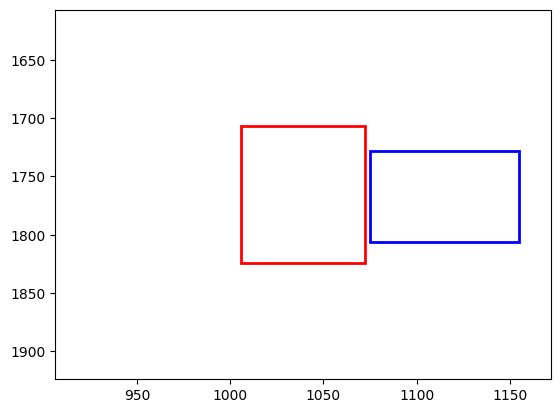

In [3]:
# Visualizing the sample coordinates from List A and List B
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Coordinates of the bounding box [x_min, y_min, x_max, y_max]
bbox1 = [1006, 1707, 1072, 1824]
bbox2 =[1075, 1728, 1155, 1806]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bounding box
rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1], linewidth=2, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1], linewidth=2, edgecolor='b', facecolor='none')

# Add the bounding box to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)
# Set axis limits
ax.set_xlim(bbox1[0] - 100, bbox1[2] + 100)
ax.set_ylim(bbox1[1] - 100, bbox1[3] + 100)

# Show plot
plt.gca().invert_yaxis()  # Invert y-axis to match the image coordinate system
plt.show()
